In [1]:
import tensorflow as tf ##impor TF
import timeit
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import tensorflow_datasets as tfds

In [ ]:
#!pip install tensorflow_datasets

In [14]:
def eager_function(x):
  result = 2*x**2 + 3*x + 5
  #print(result)
  return result

In [5]:
x = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])

In [15]:
eager_function(x)

<tf.Tensor 'add_1:0' shape=(5,) dtype=float32>

In [16]:
print("Eager time:", timeit.timeit(lambda: eager_function(x), number=500))

Eager time: 1.7377831369958585


In [2]:
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph() 

In [4]:
x = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])
m = tf.constant([2.0])
y = tf.constant([3.0])
z = tf.constant([5.0])

In [5]:
pow_op = tf.pow(x, m, name='potencia')
mul_op = tf.multiply(pow_op, m, name='Multiplx2')
mul_op2 = tf.multiply(x, y, name='Multiplx3')
add_op = tf.add(mul_op2, mul_op, name='sumar')
poli_op = tf.add(z, add_op, name='polinomio')

In [7]:
with tf.compat.v1.Session() as sess:
    writer = tf.compat.v1.summary.FileWriter('./graphs', sess.graph)
    orden_sup, anw = sess.run([pow_op, poli_op])
    print(anw)
    

[10. 19. 32. 49. 70.]


In [8]:
%load_ext tensorboard
%tensorboard --logdir="graphs/" 

In [10]:
@tf.function
def eager_function(x):
  result = 2*x**2 + 3*x + 5
  print(result)
  return result

In [12]:
graph_function = tf.function(eager_function)

In [17]:
print("Graph time:", timeit.timeit(lambda: graph_function(x), number=500))

Graph time: 0.44852274599543307


In [2]:
## tensores

In [3]:
scalar = tf.constant(4,dtype=tf.int32,name='Const')

In [6]:
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [7]:
vector = tf.constant([2.0, 3.0, 4.0], dtype=tf.float64)

In [8]:
vector

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 3., 4.])>

In [9]:
matriz = tf.constant([[1, 2],
                      [3, 4],
                      [5, 6]], dtype=tf.float32)

In [10]:
matriz

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [11]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

In [12]:
rank_3_tensor

<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]], dtype=int32)>

In [13]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


In [14]:
print(rank_3_tensor[1, :, :])

tf.Tensor(
[[10 11 12 13 14]
 [15 16 17 18 19]], shape=(2, 5), dtype=int32)


In [17]:
a = tf.constant([[1, 2],
                 [3, 4]])
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [18]:
b = tf.ones([2,2],dtype=tf.int32) 
b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

In [19]:
print("suma:",tf.add(a, b), "\n")

suma: tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 



In [20]:
print("suma:",a + b, "\n")

suma: tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 



In [22]:
print("multip. elementwise:",tf.multiply(a, b), "\n")

multip. elementwise: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 



In [23]:
print("multip. elementwise:",a * b, "\n")

multip. elementwise: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 



In [24]:
print("multip. matriz",tf.matmul(a, b), "\n")

multip. matriz tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [25]:
print("multip. matriz",a @ b, "\n")

multip. matriz tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [28]:
c = tf.constant([[4, 5], [10, 1]],tf.int32) 
c

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 4,  5],
       [10,  1]], dtype=int32)>

In [30]:
d= c+b
d

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5,  6],
       [11,  2]], dtype=int32)>

In [32]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]],tf.float64)
c

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 4.,  5.],
       [10.,  1.]])>

In [33]:
print(tf.reduce_max(c))

tf.Tensor(10.0, shape=(), dtype=float64)


In [34]:
print(tf.reduce_mean(c))

tf.Tensor(5.0, shape=(), dtype=float64)


In [35]:
print(tf.argmax(c))

tf.Tensor([1 0], shape=(2,), dtype=int64)


In [36]:
print(tf.acosh(c))

tf.Tensor(
[[2.06343707 2.29243167]
 [2.99322285 0.        ]], shape=(2, 2), dtype=float64)


In [37]:
tf.rank(c)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [38]:
d= tf.random.uniform(shape=[200],minval=-10., maxval=10.)

In [39]:
e= tf.nn.relu(d).numpy()

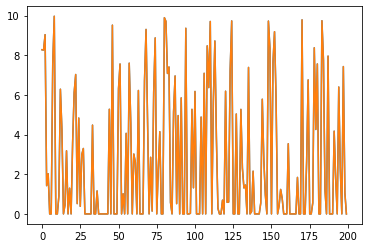

In [43]:
plt.plot(tf.nn.relu(d).numpy())
plt.plot(tf.nn.relu(e).numpy())

In [ ]:
## broadcasting

In [2]:
x = tf.constant([1, 2, 3])

In [7]:
y = tf.constant(3)
z = tf.constant([3, 3, 3])

In [9]:
tf.multiply(x,z)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [11]:
a = tf.constant([[1., 2.], [3., 4.]])
b = tf.constant([[1.], [2.]])

In [14]:
c= a+ b

In [16]:
d = tf.tile(b, [1,2])

In [18]:
d+a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [19]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9] ]

In [20]:
tf.constant(ragged_list)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [21]:
ragged_tensor=tf.ragged.constant(ragged_list)

In [22]:
ragged_tensor

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>

In [23]:
tensor_strings = tf.constant(["Bienvenidos", 
                                "al",
                                 "curso de:",
                                 "TensorFlow 2",
                                 "para Deep Learning",
                              "🥳👍"])

In [24]:
tensor_strings

<tf.Tensor: shape=(6,), dtype=string, numpy=
array([b'Bienvenidos', b'al', b'curso de:', b'TensorFlow 2',
       b'para Deep Learning', b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'],
      dtype=object)>

In [25]:
tf.strings.lower(tensor_strings)

<tf.Tensor: shape=(6,), dtype=string, numpy=
array([b'bienvenidos', b'al', b'curso de:', b'tensorflow 2',
       b'para deep learning', b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'],
      dtype=object)>

In [27]:
tf.strings.ngrams(tensor_strings,2)

<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Bienvenidos al', b'al curso de:', b'curso de: TensorFlow 2',
       b'TensorFlow 2 para Deep Learning',
       b'para Deep Learning \xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'],
      dtype=object)>

In [35]:
num_buckets=50
word_buckets = tf.strings.to_hash_bucket(tensor_strings, num_buckets)

In [36]:
word_buckets

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([39, 24,  7, 27,  3,  5])>

In [39]:
ids=tf.constant([0])
word_embeddings = tf.nn.embedding_lookup(word_buckets,ids)

In [40]:
word_embeddings

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([39])>

In [41]:
###Variables

In [42]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])

In [43]:
my_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [60]:
my_variable=tf.Variable(my_tensor)

In [47]:
my_variable

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [48]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


In [49]:
bool_variable = tf.Variable([False, False, False, True], name="Boolean")

In [51]:
print("Shape: ", bool_variable.shape)
print("DType: ", bool_variable.dtype)
print("As NumPy: ", bool_variable.numpy())

Shape:  (4,)
DType:  <dtype: 'bool'>
As NumPy:  [False False False  True]


In [52]:
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

In [53]:
print("Shape: ", complex_variable.shape)
print("DType: ", complex_variable.dtype)
print("As NumPy: ", complex_variable.numpy())

Shape:  (2,)
DType:  <dtype: 'complex128'>
As NumPy:  [5.+4.j 6.+1.j]


In [61]:
my_variable

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [63]:
my_variable.assign_sub([[11.0, 11.0], [4.0, 7.0]])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [64]:
my_variable.assign([1.0, 2.0, 3.0])

ValueError: Cannot assign value to variable ' Variable:0': Shape mismatch.The variable shape (2, 2), and the assigned value shape (3,) are incompatible.

In [65]:
##Gradientes

In [66]:
x = tf.Variable(3.0)

In [67]:
with tf.GradientTape() as tape:
    y =x**2
dy_dx = tape.gradient(y,x)

In [68]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [70]:
trainable = tf.Variable(1., trainable=True, name='x_trainable')
no_trainable = tf.Variable(1., trainable=False, name='x_untrainable')

In [83]:
with tf.GradientTape(persistent=True) as tape:
    x1 = trainable * 2.
    x2 = no_trainable *2.

In [92]:
dx2_tr=tape.gradient(x2, no_trainable)

In [95]:
[var.name for var in tape.watched_variables()]

['x_trainable:0']

In [96]:
w = tf.Variable(tf.random.normal((2, 3)), name='w')
b = tf.Variable(tf.zeros(3, dtype=tf.float32), name='b')
x = [[1., 2.]]

In [98]:
with tf.GradientTape(persistent=True) as tape:
    y= x @ w + b
    loss = tf.reduce_mean(y) 
[dl_dw, dl_db] = tape.gradient(loss,[w,b])

In [101]:
my_vars = {
    'w': w,
    'b': b
}

In [102]:
grad = tape.gradient(loss, my_vars)

In [103]:
grad

{'w': <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[0.33333334, 0.33333334, 0.33333334],
        [0.6666667 , 0.6666667 , 0.6666667 ]], dtype=float32)>,
 'b': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.33333334, 0.33333334, 0.33333334], dtype=float32)>}

In [104]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

In [105]:
my_dict={'x0': x0, 'x1': x1}

In [106]:
with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x1)
    y0 = tf.math.sin(x0)
    y1 = tf.nn.softplus(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)
grad = tape.gradient(ys, my_dict)
    
    

In [109]:
grad['x1']

<tf.Tensor: shape=(), dtype=float32, numpy=0.9999546>

# Construir pipelines en TensorFlow

- tf.data.Dataset.from_tensors()
- tf.data.Dataset.from_tensor_slices()

In [114]:
### tipo numpy

In [2]:

array_examp =np.array(range(70)).reshape(7,10)
lista_examp = array_examp.tolist()
print(array_examp)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]]


In [3]:
dataset1 = tf.data.Dataset.from_tensor_slices(lista_examp)
dataset2 = tf.data.Dataset.from_tensors(array_examp)

In [122]:
dataset1

<TensorSliceDataset element_spec=TensorSpec(shape=(10,), dtype=tf.int32, name=None)>

In [124]:
dataset2.element_spec

TensorSpec(shape=(7, 10), dtype=tf.int64, name=None)

In [129]:
tensor1 = tf.ones([10,2,2])
tensor2 = tf.ones([10,1])
tensor3 = tf.ones([9,2,2])*2

In [134]:
dataset3 = tf.data.Dataset.from_tensors((tensor1, tensor3))

In [135]:
dataset3

<TensorDataset element_spec=(TensorSpec(shape=(10, 2, 2), dtype=tf.float32, name=None), TensorSpec(shape=(9, 2, 2), dtype=tf.float32, name=None))>

In [143]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

In [199]:
dataset1 = tf.data.Dataset.from_tensor_slices(lista_examp)

In [200]:
for ds in dataset1.as_numpy_iterator():
    print(ds)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]


In [ ]:
data HD -> data[2]ram <-> data[2]vram +[DAG]

In [13]:
def dense_1_step(x):
  return tf.multiply(x,1)

In [42]:
dataset4 = dataset1.map(dense_1_step,num_parallel_calls=tf.data.AUTOTUNE).shuffle(1).batch(3).repeat(1).prefetch(tf.data.AUTOTUNE).enumerate(0)


for ds in dataset4.as_numpy_iterator():
    print(ds)

(0, array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]], dtype=int32))
(1, array([[30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]], dtype=int32))
(2, array([[60, 61, 62, 63, 64, 65, 66, 67, 68, 69]], dtype=int32))


In [218]:
### datos csv

In [219]:
pandas_dataframe = pd.read_csv('/home/javier/Bienvenidos-al-curso-/Sunspots.csv')

In [220]:
pandas_dataframe.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [239]:
pandas_dataframe.columns

Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')

In [240]:
pandas_dataframe.rename(columns={'Unnamed: 0':'int'})

,int,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3230,3230,2018-03-31,2.5
3231,3231,2018-04-30,8.9
3232,3232,2018-05-31,13.2
3233,3233,2018-06-30,15.9


In [221]:
dataframe_dict = dict(pandas_dataframe)

In [223]:
pandas_dataset = tf.data.Dataset.from_tensor_slices(dataframe_dict)

In [224]:
pandas_dataset

<TensorSliceDataset element_spec={'Unnamed: 0': TensorSpec(shape=(), dtype=tf.int64, name=None), 'Date': TensorSpec(shape=(), dtype=tf.string, name=None), 'Monthly Mean Total Sunspot Number': TensorSpec(shape=(), dtype=tf.float64, name=None)}>

In [234]:
csv_dataset = tf.data.experimental.make_csv_dataset('/home/javier/Bienvenidos-al-curso-/Sunspots.csv',
                                                    batch_size=3,
                                                    label_name='Monthly Mean Total Sunspot Number', select_columns=[1,2])

In [235]:
csv_dataset

<PrefetchDataset element_spec=(OrderedDict([('Date', TensorSpec(shape=(3,), dtype=tf.string, name=None))]), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

In [227]:
def extract_time(x,y):
    date_ = datetime.fromisoformat(x.numpy()[0].decode("utf-8"))
    year =date_.year
    month =date_.month
    day =date_.day

    return year,month, day, y
    

In [230]:
csv_dataset_map =csv_dataset.map(lambda x, y: tf.py_function(extract_time, [x['Date'],y] , [tf.int32,tf.int32,tf.int32, tf.float32] ))

In [231]:
csv_dataset_map

<MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None))>

In [ ]:
##Imagenes

In [50]:
batch_size = 4
img_height = 224
img_width = 224

ds_image= tf.keras.utils.image_dataset_from_directory(
   '/home/javier/Downloads/val/images/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123)

Found 48 files belonging to 3 classes.


In [51]:
class_names = ds_image.class_names
print(class_names)

['cats', 'dogs', 'horses']


In [54]:
 for image, labels in ds_image.as_numpy_iterator():
        print(image.shape, labels)

(4, 224, 224, 3) [0 0 0 1]
(4, 224, 224, 3) [0 2 1 2]
(4, 224, 224, 3) [2 0 0 0]
(4, 224, 224, 3) [0 2 2 1]
(4, 224, 224, 3) [2 2 2 0]
(4, 224, 224, 3) [2 2 2 1]
(4, 224, 224, 3) [1 0 1 1]
(4, 224, 224, 3) [2 2 1 1]
(4, 224, 224, 3) [0 0 0 1]
(4, 224, 224, 3) [2 0 1 2]
(4, 224, 224, 3) [0 1 2 1]
(4, 224, 224, 3) [2 1 2 1]


In [55]:
ds_image

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

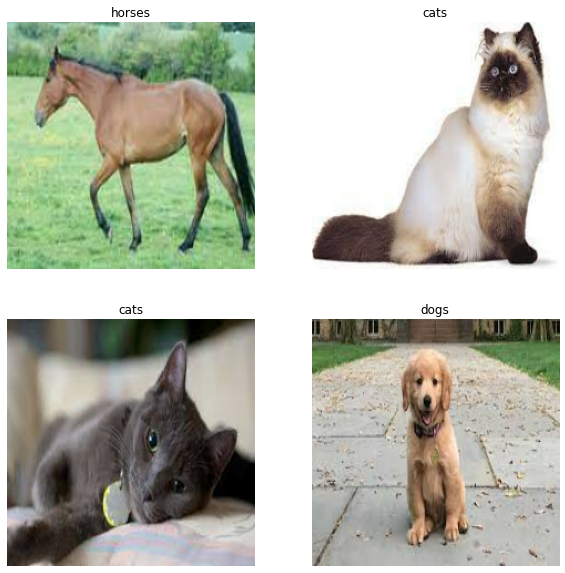

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_image.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [56]:
ds_image_train= tf.keras.utils.image_dataset_from_directory(
   '/home/javier/Downloads/val/images/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training')

ds_image_validation= tf.keras.utils.image_dataset_from_directory(
   '/home/javier/Downloads/val/images/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
   validation_split=0.2,
    subset='validation')

Found 48 files belonging to 3 classes.
Using 39 files for training.
Found 48 files belonging to 3 classes.
Using 9 files for validation.


In [57]:
for img, lab in ds_image_train.as_numpy_iterator():
    print(lab)

[2 0 0 1]
[1 0 0 1]
[2 1 0 1]
[1 0 0 2]
[1 2 2 0]
[0 0 2 1]
[2 2 2 2]
[0 0 2 1]
[0 0 2 1]
[2 1 2]


In [58]:
for img, lab in ds_image_validation.as_numpy_iterator():
    print(lab)

[1 2 2 1]
[0 2 2 1]
[1]


In [11]:
(ds_train, ds_test), ds_info = tfds.load(
    name = 'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

In [12]:
ds_test

<_OptionsDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

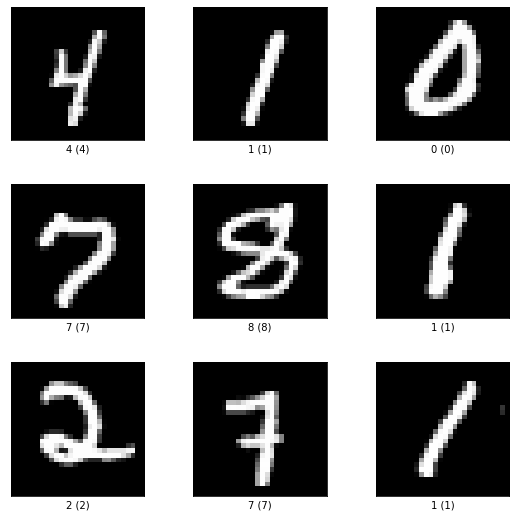

In [67]:
fig = tfds.show_examples(ds_train, ds_info)

In [70]:
def normalize_img(image,label ):
  return tf.cast(image, tf.float32) / 255., tf.one_hot(label,depth=10)


def data_load(data_ds,augmented=normalize_img,shuffle_=True ,batch_=5):
    
    data_ds = data_ds.map(
        augmented, num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [81]:
ds_train_postprop= data_load(ds_train,normalize_img,shuffle_=True, batch_=3)

In [82]:
ds_test_postprop= data_load(ds_test,normalize_img,shuffle_=False, batch_=3)

(3, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)
(3, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)
(3, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)
(3, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)


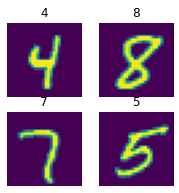

In [83]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in ds_train_postprop.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(np.squeeze(ds[0].numpy()))
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

In [95]:
def augment_data(images, labels):
    images = tf.image.random_flip_left_right(images)
    images = tf.image.random_flip_up_down(images)
    images = tf.image.rot90(images)
    return images,  tf.one_hot(labels,depth=10)

In [96]:
ds_train_augm= data_load(ds_train,augment_data,shuffle_=True, batch_=3)

(3, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)
(3, 28, 28, 1) tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)
(3, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(3, 10), dtype=float32)
(3, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(3, 10), dtype=float32)


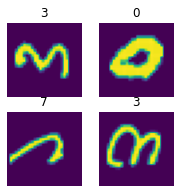

In [98]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in ds_train_augm.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(np.squeeze(ds[0].numpy()))
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

In [ ]:
##MEtodo 2 preproces. CPU tf.sequence

In [115]:
tf.keras.backend.clear_session()
from tensorflow.keras import layers, Sequential
trainAug = Sequential([
   layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.Rescaling(scale=1.0 / 255)
    
],name="trainAug")
layer_onehot = layers.CategoryEncoding(
          num_tokens=10, output_mode="one_hot")

In [104]:
def data_load_sequential(data_ds,shuffle_train=True ,batch_=5):
    data_ds = data_ds.map(
        lambda x, y: (trainAug(x,shuffle_train),layer_onehot(y)), num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train_sq = data_load_sequential(ds_train)
data_test_sq = data_load_sequential(ds_test,shuffle_train=False)

In [103]:
data_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

(5, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
(5, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
(5, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(5, 10), dtype=float32)
(5, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)


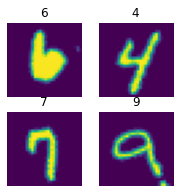

In [105]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in data_train_sq.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(np.squeeze(ds[0].numpy()))
    shaped=ds[0].numpy().shape
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

In [111]:
#metodo 3. GPU

In [116]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(shaped),batch_size=None))
model.add(trainAug)
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 trainAug (Sequential)       (None, 28, 28, 1)         0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Pipeline Texto

In [40]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [41]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(5)))
print(train_examples_batch,train_labels_batch)

tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot de

In [17]:
def tf_lower_and_split_punct(text):

  text = tf.strings.lower(text)
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  text = tf.strings.strip(text)
  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [7]:
def data_load_txt(data_ds,shuffle_=True ,batch_=12):
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(2)
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [29]:
BATCH=32
data_train = data_load_txt(train_data,batch_=BATCH)
data_test = data_load_txt(test_data,shuffle_=False,batch_=BATCH)
data_val = data_load_txt(validation_data,shuffle_=False,batch_=BATCH)

In [30]:
data_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [31]:
for idx in data_train.take(1):
    print(idx[0])

tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot de

In [32]:
max_vocab_size = 10000

In [33]:
input_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct, max_tokens=max_vocab_size)

In [34]:
reviews_only_ds = data_train.map(lambda a, b: a) 
input_text_processor.adapt(reviews_only_ds)

In [35]:
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', 'the', '.', ',', 'and', 'a', 'of', 'to', 'is']

In [36]:
for idx in data_train.take(1):
    example_tokens = input_text_processor(idx[0])
    print(idx[1],example_tokens)


tf.Tensor([0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0], shape=(32,), dtype=int64) tf.Tensor(
[[  34   14   16 ...    0    0    0]
 [  34   13   28 ...    0    0    0]
 [  34 3755 5748 ...    0    0    0]
 ...
 [  34   14   20 ...    0    0    0]
 [  34 1923 4145 ...    0    0    0]
 [  34 1157    4 ...    0    0    0]], shape=(32, 653), dtype=int64)


Text(0.5, 1.0, 'Mask')

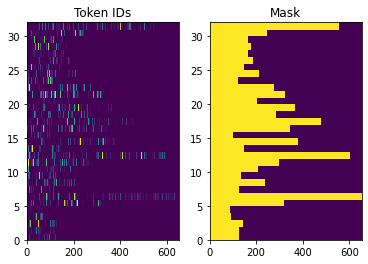

In [37]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens)
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [38]:
from tensorflow.keras.layers import Embedding,Dense
from tensorflow.keras import Sequential

vocab_size = 10000
embedding_dim=16

model = Sequential([
input_text_processor,
  Embedding(input_dim = vocab_size, 
            output_dim = embedding_dim, 
            name="embedding"),
   Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 dense (Dense)               (None, None, 1)           17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


Funcion F: X---> F(X)= Yp

Tareas supervisadas (X,Y) -> regresion(Y pertenece Re)
                          -> clasificacion(Y pertenece variables discretas)
---------------------
X   Y
2   4     F(2)->Yp~4
4   8     F(4)->Yp~8
5   10
6   12
7   14


   Yp~Y  ---> funcion de costo (Loss)   Loss grande->> modelo no funciona
                                        Loss pequeno->> modelo funciona  
 






















## REGRESION LINEAL: Y(x)=w*x+b

,x,y
0,-10.000000,-53.466248
1,-9.933110,-48.690483
2,-9.866220,-52.030170
3,-9.799331,-50.580143
4,-9.732442,-48.620770


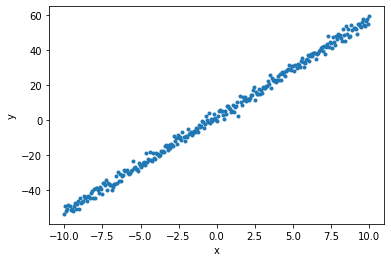

In [79]:
##Generacion de datos
numbers= 300
x = tf.linspace(-10.0, 10.0,numbers )
inter_true=tf.constant(2.3)
pendi_true=tf.constant(5.5)
noise = tf.random.normal(
    (numbers,), mean=0.001, stddev=1.9, dtype=tf.dtypes.float32)
y = pendi_true*x+inter_true+noise
plt.scatter(x,y,marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend
dict_={'x':x,'y':y}
df =pd.DataFrame(dict_)
df.head()

In [81]:
pandas_dataset = tf.data.Dataset.from_tensor_slices((df['x'].values,df['y'].values))
len_df =pandas_dataset.cardinality().numpy()
print(len_df)

300


In [5]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,batch_=30):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        ds = ds.shuffle(len_df, seed=12)
    
    train_size = int(train_split * len_df)
    val_size = int(val_split * len_df)
    
    train_ds = ds.take(train_size).batch(batch_).prefetch(tf.data.AUTOTUNE)
    val_ds = ds.skip(train_size).take(val_size).batch(batch_).prefetch(tf.data.AUTOTUNE)
    test_ds = ds.skip(train_size).skip(val_size).batch(batch_).prefetch(tf.data.AUTOTUNE)
    
    return train_ds, val_ds, test_ds

In [83]:
train_data,val_data, test_data = get_dataset_partitions_tf(pandas_dataset, train_split=0.7, val_split=0.15, test_split=0.15)

## Entrenamiento

In [72]:
w = tf.Variable(np.random.normal(), name='w')
b = tf.Variable(np.random.normal(), name='b')

In [73]:
def loss_mse(y_pred,y):
    return tf.reduce_mean(tf.square(y_pred-y))

In [74]:
def output_(w,b,x,activation=tf.keras.activations.linear):
    y_pred = tf.add(tf.multiply(w, x), b)
    return  activation(y_pred)

In [75]:
learning_rate=0.01
Epocas=100
loss_hist = []
loss_hist_val = []
loss_batch =[]

for st in range(Epocas):
    for dsx, dsy  in train_data:
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch([w,b])
            y_pred = output_(w,b,dsx)
            loss = loss_mse(y_pred,dsy)
        dl_dw,dl_db = tape.gradient(loss, [w,b])
        w = w -learning_rate *dl_dw
        b = b - learning_rate * dl_db 
        ##vis.
        loss_batch.append(loss.numpy())
    loss_v=[]
    for dsx_val,dsy_val in val_data:
        y_pred_val = output_(w,b,dsx_val)
        loss_batch_val = loss_mse(y_pred_val,dsy_val)
        loss_v.append(loss_batch_val.numpy())
        
    loss_val =np.mean(loss_v)
    loss_epoc = np.mean(loss_batch)
    loss_hist.append(loss_epoc)
    loss_hist_val.append(loss_val)
    if st%10==0:
        print('epoch: {}; loss_mse_train: {}; loss_mse_validation: {};  w: {}; b: {}'.format(st,loss_epoc,loss_val,w,b))
        

    
    
    


epoch: 0; loss_mse_train: 145.3193817138672; loss_mse_validation: 5.659868240356445;  w: 5.437473773956299; b: -0.045666299760341644
epoch: 10; loss_mse_train: 17.82425308227539; loss_mse_validation: 4.016369342803955;  w: 5.448591232299805; b: 1.4208046197891235
epoch: 20; loss_mse_train: 11.142156600952148; loss_mse_validation: 3.790426731109619;  w: 5.471552848815918; b: 1.8118928670883179
epoch: 30; loss_mse_train: 8.751199722290039; loss_mse_validation: 2.9943532943725586;  w: 5.488683700561523; b: 1.8627264499664307
epoch: 40; loss_mse_train: 7.546120643615723; loss_mse_validation: 3.7825100421905518;  w: 5.517611026763916; b: 1.8956327438354492
epoch: 50; loss_mse_train: 6.842416286468506; loss_mse_validation: 4.924261093139648;  w: 5.4668474197387695; b: 1.8686705827713013
epoch: 60; loss_mse_train: 6.336497783660889; loss_mse_validation: 3.205540180206299;  w: 5.586379528045654; b: 1.8746604919433594
epoch: 70; loss_mse_train: 5.992779731750488; loss_mse_validation: 4.87202692

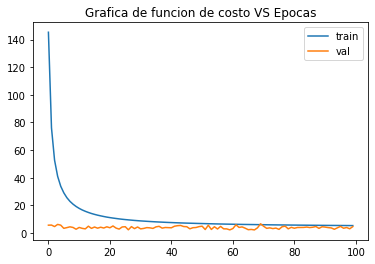

In [76]:

plt.plot(loss_hist,label='train')
plt.plot(loss_hist_val,label='val')
plt.title('Grafica de funcion de costo VS Epocas')
plt.legend()

In [77]:
loss_t=[]
x_test=[]
y_test=[]
for dsx_test,dsy_test in test_data:
        y_pred_test = output_(w,b,dsx_test)
        loss_batch_test = loss_mse(y_pred_test,dsy_test)
        loss_t.append(loss_batch_test.numpy())
        x_test.append(dsx_test.numpy())
        y_test.append(dsy_test.numpy())
loss_test =np.mean(loss_t)
print("Funcion de costo para datos prueba:",loss_test)

Funcion de costo para datos prueba: 3.2964652


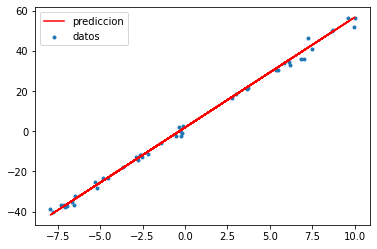

In [78]:
# Prediccion de la regresion!
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
plt.scatter(x_test,y_test,marker='.', label='datos')
plt.plot(x_test,x_test*w+b,color='red', label='prediccion')
plt.legend()

## Entrenamiento Sequential

In [104]:
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = tf.keras.Sequential()
model.add(tf.keras.Input((1,)))
model.add(Dense(1))

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


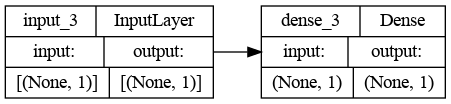

In [106]:
tf.keras.utils.plot_model(
    model,
    rankdir= 'LR',#"TB",
    to_file="model.png",
    show_shapes=True,
    show_layer_activations=False)

In [107]:
sgd= SGD(learning_rate)

In [108]:
model.compile(loss='mse', optimizer=sgd, metrics='mse')

In [109]:
history= model.fit(train_data,validation_data=val_data, epochs=100,verbose=2)

Epoch 1/100
7/7 - 0s - loss: 151.2962 - mse: 151.2962 - val_loss: 8.5109 - val_mse: 8.5109 - 389ms/epoch - 56ms/step
Epoch 2/100
7/7 - 0s - loss: 7.9268 - mse: 7.9268 - val_loss: 8.8635 - val_mse: 8.8635 - 20ms/epoch - 3ms/step
Epoch 3/100
7/7 - 0s - loss: 6.2737 - mse: 6.2737 - val_loss: 7.7555 - val_mse: 7.7555 - 16ms/epoch - 2ms/step
Epoch 4/100
7/7 - 0s - loss: 5.6417 - mse: 5.6417 - val_loss: 6.3508 - val_mse: 6.3508 - 18ms/epoch - 3ms/step
Epoch 5/100
7/7 - 0s - loss: 5.3835 - mse: 5.3835 - val_loss: 5.2489 - val_mse: 5.2489 - 17ms/epoch - 2ms/step
Epoch 6/100
7/7 - 0s - loss: 4.9608 - mse: 4.9608 - val_loss: 5.8177 - val_mse: 5.8177 - 15ms/epoch - 2ms/step
Epoch 7/100
7/7 - 0s - loss: 4.2387 - mse: 4.2387 - val_loss: 5.0820 - val_mse: 5.0820 - 16ms/epoch - 2ms/step
Epoch 8/100
7/7 - 0s - loss: 4.6768 - mse: 4.6768 - val_loss: 4.6311 - val_mse: 4.6311 - 18ms/epoch - 3ms/step
Epoch 9/100
7/7 - 0s - loss: 4.4179 - mse: 4.4179 - val_loss: 2.6639 - val_mse: 2.6639 - 17ms/epoch - 2ms/

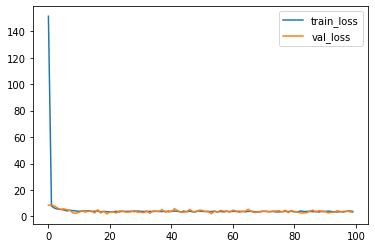

In [110]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [106]:


try:
  my_variable.assign([1.0, 2.0, 3.0])
except Exception as e:
  print(f"{type(e).__name__}: {e}")



NameError: name 'my_variable' is not defined


In [107]:


my_second_variable = tf.Variable(my_variable)
print(my_second_variable)



NameError: name 'my_variable' is not defined

In [108]:
my_variable.assign([[22.0, 33.0], [13.3, 17.0]]) 
print(my_variable)

NameError: name 'my_variable' is not defined

In [109]:


print(my_second_variable)

my_second_variable.get_shape()

NameError: name 'my_second_variable' is not defined

In [110]:


v = tf.Variable(0.)
print(v)
read_and_decrement = tf.function(lambda: v.assign_sub(0.1))
for _ in range(4):
  print(read_and_decrement()) 



<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
tf.Tensor(-0.1, shape=(), dtype=float32)
tf.Tensor(-0.2, shape=(), dtype=float32)
tf.Tensor(-0.3, shape=(), dtype=float32)
tf.Tensor(-0.4, shape=(), dtype=float32)


In [448]:


v.read_value()



<tf.Tensor: shape=(), dtype=float32, numpy=-0.4>

In [449]:


v = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
indices = tf.constant([[4], [3], [1] ,[7]])
updates = tf.constant([9, 10, 11, 12])
v.scatter_nd_update(indices, updates)
print(v)



value_3 = tf.convert_to_tensor(np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32))
print(value_3)



<tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([ 1, 11,  3, 10,  9,  6,  7, 12], dtype=int32)>
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [450]:
trainable = tf.Variable(1.,name='x_trainable')
non_trainable = tf.Variable(2., trainable=False,name='x_No_trainable')
with tf.GradientTape(persistent=True) as tape:
  x1 = trainable * 2.
  x2 = non_trainable * 2.

In [451]:
tape.gradient(x1, trainable)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [452]:
tape.gradient(x1, trainable)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [453]:
tape.gradient(x2, non_trainable) 

In [454]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

In [455]:
with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [456]:
print(w.shape)
print(dl_dw.shape)
print(dl_db)

(3, 2)
(3, 2)
tf.Tensor([-0.19898558 -2.2939615 ], shape=(2,), dtype=float32)


In [457]:


my_vars = {
    'w': w,
    'b': b
}
grad = tape.gradient(loss, my_vars)
print(grad['b'])
[var.name for var in tape.watched_variables()]

tf.Tensor([-0.19898558 -2.2939615 ], shape=(2,), dtype=float32)


['w:0', 'b:0']

In [458]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch([x1,x0])
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

grad = tape.gradient(ys, {'x0': x0, 'x1': x1})
print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())


dy/dx0: tf.Tensor(1.0, shape=(), dtype=float32)
dy/dx1: 0.9999546


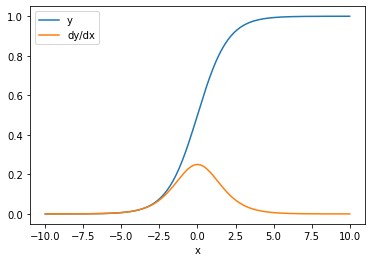

In [459]:


x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)
    
dy_dx = tape.gradient(y, x)
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')



In [460]:
[var.name for var in tape.watched_variables()]

[]

In [461]:
array_examp =np.array(range(70)).reshape(7,10)
array_examp1 =np.array(range(70,140)).reshape(7,10)
lista_examp = array_examp.tolist()
print(array_examp.shape)



(7, 10)


In [462]:
dataset1 = tf.data.Dataset.from_tensor_slices(array_examp)
dataset2 = tf.data.Dataset.from_tensors(array_examp)
dataset_lista_1 = tf.data.Dataset.from_tensor_slices(lista_examp)
dataset_lista_2 = tf.data.Dataset.from_tensors(lista_examp)


In [463]:


print(dataset1.element_spec)
print(dataset2.element_spec)
print(dataset_lista_1.element_spec)
print(dataset_lista_2.element_spec)



TensorSpec(shape=(10,), dtype=tf.int64, name=None)
TensorSpec(shape=(7, 10), dtype=tf.int64, name=None)
TensorSpec(shape=(10,), dtype=tf.int32, name=None)
TensorSpec(shape=(7, 10), dtype=tf.int32, name=None)


In [464]:
dataset3 = tf.data.Dataset.from_tensor_slices((array_examp1,array_examp1),name='dataset3')
print(dataset3.element_spec)

(TensorSpec(shape=(10,), dtype=tf.int64, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))


In [465]:
tensor1 = tf.ones([10,2,2],name='tensor1')
tensor2 = tf.ones([10,1],name='tensor2')
tensor3 = 2*tf.ones([9,2,2])



In [466]:
tensor3

<tf.Tensor: shape=(9, 2, 2), dtype=float32, numpy=
array([[[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]]], dtype=float32)>

In [467]:


dataset4 = tf.data.Dataset.from_tensor_slices((tensor1, tensor2),name='dataset4')

print(dataset4.element_spec)

(TensorSpec(shape=(2, 2), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float32, name=None))


In [468]:
dataset5 = tf.data.Dataset.from_tensor_slices((tensor1, tensor3),name='dataset4')

ValueError: Dimensions 10 and 9 are not compatible

In [ ]:


dataset5 = tf.data.Dataset.from_tensors((tensor1, tensor2))
dataset5

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset1))

In [ ]:
dataset3

In [ ]:
def sep(x):
    return x/69

In [ ]:
dataset_enu = dataset1.map(sep).batch(1,drop_remainder=False).enumerate(start=0)

In [ ]:
for element in dataset_enu.as_numpy_iterator():
  print(element)

In [228]:
with open('/home/javier/Bienvenidos-al-curso-/sonnets.txt', 'r', encoding='utf-8') as file:
    text_string = file.read().replace('\n', ' ')
text_string[:500]



"FROM fairest creatures we desire increase, That thereby beauty's rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou, contracted to thine own bright eyes, Feed'st thy light'st flame with self-substantial fuel, Making a famine where abundance lies, Thyself thy foe, to thy sweet self too cruel. Thou that art now the world's fresh ornament And only herald to the gaudy spring, Within thine own bud buriest thy content And, tender churl, makes"

In [238]:
dataset_text = tf.data.TextLineDataset("sonnets.txt")

In [239]:
dataset_text

<TextLineDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [240]:
dataset_text_set = tf.data.Dataset.list_files("/home/javier/Bienvenidos-al-curso-/*.txt")

In [241]:
dataset_text_set

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [247]:
import pandas as pd
pandas_dataframe = pd.read_csv('/home/javier/Bienvenidos-al-curso-/Sunspots.csv')

dataframe_dict = dict(pandas_dataframe)
pandas_dataframe.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [254]:
pandas_dataset = tf.data.Dataset.from_tensor_slices((pandas_dataframe['Date'].values,pandas_dataframe['Monthly Mean Total Sunspot Number'].values))
pandas_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [255]:
pandas_dataframe.values

array([[0, '1749-01-31', 96.7],
       [1, '1749-02-28', 104.3],
       [2, '1749-03-31', 116.7],
       ...,
       [3232, '2018-05-31', 13.2],
       [3233, '2018-06-30', 15.9],
       [3234, '2018-07-31', 1.6]], dtype=object)

In [336]:


csv_dataset = tf.data.experimental.make_csv_dataset('/home/javier/Bienvenidos-al-curso-/Sunspots.csv',
                                                    batch_size=2, num_epochs=1,shuffle=False, select_columns=[1,2],
                                                    label_name='Monthly Mean Total Sunspot Number').take(1)
#csv_dataset.element_spec



In [337]:
for element in csv_dataset.as_numpy_iterator():
   print(element)

(OrderedDict([('Date', array([b'1749-01-31', b'1749-02-28'], dtype=object))]), array([ 96.7, 104.3], dtype=float32))


In [338]:
csv_dataset

<TakeDataset element_spec=(OrderedDict([('Date', TensorSpec(shape=(None,), dtype=tf.string, name=None))]), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [326]:
element[1]

array([96.7], dtype=float32)

In [343]:
def extract_time(x,label):
    date_ = datetime.fromisoformat(x.numpy()[0].decode("utf-8"))
    year =date_.year
    month =date_.month
    day =date_.day
    return day, year, month, label


data_map=csv_dataset.map(lambda x,z: tf.py_function(extract_time, [x['Date'],z], [tf.int32,tf.int32,tf.int32,tf.float32]))

In [344]:
data_map

<MapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None))>

In [345]:
for element in data_map.as_numpy_iterator():
   print(element)

(31, 1749, 1, array([ 96.7, 104.3], dtype=float32))


In [442]:
for element in series_dataset.as_numpy_iterator():
   print(element)

(array([[ 96.7, 104.3, 116.7,  92.8, 141.7],
       [104.3, 116.7,  92.8, 141.7, 139.2],
       [116.7,  92.8, 141.7, 139.2, 158. ],
       [ 92.8, 141.7, 139.2, 158. , 110.5]]), array([139.2, 158. , 110.5, 126.5]))


In [434]:
ss=tf.keras.utils.timeseries_dataset_from_array(
    pandas_dataframe['Monthly Mean Total Sunspot Number'].values,
    targets=None,
    sequence_length=4,
    sequence_stride=1,
    sampling_rate=2,
    batch_size=3,
    shuffle=False).take(1)


In [435]:
for element in ss.as_numpy_iterator():
   print(element)

[[ 96.7 116.7 141.7 158. ]
 [104.3  92.8 139.2 110.5]
 [116.7 141.7 158.  126.5]]


In [7]:
import seaborn as sns
data=pd.read_csv('/home/javier/Downloads/archive/creditcard.csv')

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
columns=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Class']

In [16]:
df=data.copy()

In [18]:
sns.pairplot(data[columns].sample(100), hue="Class")

Error in callback <function flush_figures at 0x7fb4adbf7e50> (for post_execute):


KeyboardInterrupt: 

In [17]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

NameError: name 'gridspec' is not defined

<Figure size 864x8064 with 0 Axes>

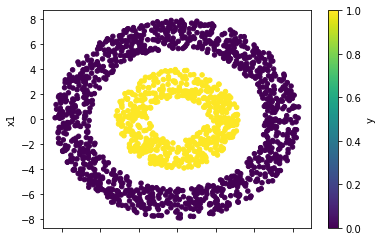

In [2]:
data_x = tf.random.uniform(
    (5000,2), minval=-10, maxval=10,seed=42, dtype=tf.float64).numpy()
def label_circle(x,y):
    if  1*np.sqrt(10)<x**2+y**2<= 5*np.sqrt(10):
        return  1
    elif  20*np.sqrt(10)>=x**2+y**2>= 10*np.sqrt(10):
        return 0
    else:
        return 2
def squared_circle(x,y):
    return x**2, y**2
    
df =pd.DataFrame(data_x,columns=['x0','x1'])
df['y'] =df.apply(lambda x: label_circle(x['x0'],x['x1']), axis=1)
df[['x02','x12']] =df.apply(lambda x: squared_circle(x['x0'],x['x1']), axis=1, result_type="expand")
df=df[df['y']!=2]
df.plot.scatter(x='x0',y='x1', c='y',colormap='viridis')


In [6]:
def preprocess(x,y):
    return tf.cast(x,tf.float64),tf.cast(y,tf.float64)
pandas_dataset_X = tf.data.Dataset.from_tensor_slices(df[['x0','x1']].values)
pandas_dataset_y = tf.data.Dataset.from_tensor_slices(df['y'].values)
dataset = tf.data.Dataset.zip((pandas_dataset_X,pandas_dataset_y))
len_df =dataset.cardinality().numpy()
dataset=dataset.shuffle(len_df)
dataset=dataset = dataset.map(
        preprocess, num_parallel_calls=tf.data.AUTOTUNE)

print(len_df,dataset.element_spec)

1715 (TensorSpec(shape=(2,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))


In [7]:
BATCH=50
train_data_class,val_data_class, test_data_class = get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1,batch_=BATCH)


In [8]:
train_data_class

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [52]:
##DEfinicion de variables
w = tf.Variable(np.random.normal(size=(2, 1)), name='w',dtype=tf.float64)
b = tf.Variable(np.random.normal(size=(1)), name='b',dtype=tf.float64)


##Salida de red neuronal (prediccion y_pred)
def output_(w,b,x,activation=tf.nn.sigmoid):
    y_pred = tf.add(tf.matmul(tf.cast(tf.math.pow(x,2),tf.float64),w), b)
    return  activation(y_pred)

## Calculo de funcion de costo, clasificacion=>cross entropy
def cross_entropy_loss(y_pred, y_true):
    ### Cross entropy
    #y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    #return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred+1e-9)+(1. - y_true) * tf.math.log(1.-y_pred+1e-9)))/len(y_pred)
    ### Cross entropy usado por keras
    cce = tf.keras.losses.BinaryCrossentropy()
    return cce(y_true,y_pred)
##Definicion de exactitud
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float64))


In [53]:
Epocas=100
loss_hist = []
loss_hist_val = []
loss_batch =[]
acc_batch =[]
learning_rate=0.001

for st in range(Epocas): ## loop de epocas
    for dsX, dsy  in train_data_class: ## loop de datos
        ##calculo de gradiente
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch([w,b])
            ##salida de red    
            y_pred = output_(w,b,dsX)
            ##calculo de la funcion de costo
            loss = cross_entropy_loss(y_pred,dsy)
            ##calculo de accuracy
            acc =  accuracy(y_pred, dsy)
        ## calculo de gradientes de w ,b
        dl_dw,dl_db = tape.gradient(loss, [w,b])
        
        ##actualizar w, b
        w = w - learning_rate * dl_dw
        b = b - learning_rate * dl_db    
        loss_batch.append(loss.numpy())
        acc_batch.append(acc.numpy())
    loss_v=[]

    for ds_valX,ds_valy in val_data_class: ##loop de validacion
        y_pred_val = output_(w,b,ds_valX)
        loss_batch_val = cross_entropy_loss(y_pred_val, ds_valy)
        acc =  accuracy(y_pred_val, ds_valy)
        
        loss_v.append(loss_batch_val.numpy())
    loss_val =np.mean(loss_v)
    
    loss_epoc = np.mean(loss_batch)
    acc_epoc = np.mean(acc_batch)
    loss_hist.append(loss_epoc)
    loss_hist_val.append(loss_val)
    
    
    
    if st%10==0:
        print('epoch: {}; loss_mse_train: {}; loss_mse_validation: {}; acc_train: {}; w: {}; b: {}'.format(st,loss_epoc,loss_val,acc_epoc,w,b))


epoch: 0; loss_mse_train: 6.257813126768936; loss_mse_validation: 6.296230213950303; acc_train: 0.686883116883117; w: [[ 1.24863701]
 [-0.5112601 ]]; b: [0.28106862]
epoch: 10; loss_mse_train: 5.72623693110989; loss_mse_validation: 5.428547106049847; acc_train: 0.687396694214876; w: [[ 0.79470053]
 [-0.7675006 ]]; b: [0.29285696]
epoch: 20; loss_mse_train: 4.400308266805287; loss_mse_validation: 0.9045003493204438; acc_train: 0.6865337043908473; w: [[-0.02117598]
 [-0.65059627]]; b: [0.32351386]
epoch: 30; loss_mse_train: 3.213462805283572; loss_mse_validation: 0.4966617331347367; acc_train: 0.6861793045664014; w: [[-0.03578821]
 [-0.30279833]]; b: [0.38392039]
epoch: 40; loss_mse_train: 2.521119458282451; loss_mse_validation: 0.3448091209216119; acc_train: 0.685774469433006; w: [[-0.0637058 ]
 [-0.08428896]]; b: [0.43101468]
epoch: 50; loss_mse_train: 2.0858251326983597; loss_mse_validation: 0.31712433809683516; acc_train: 0.6859243697478992; w: [[-0.06911137]
 [-0.07554558]]; b: [0.4

In [54]:


## accuracy test
y_pred_bath=[]
y_true=[]
x_true=[]
for ds_tesx,ds_tesy in test_data_class:
    y_pred=output_(w,b,ds_tesx)
    y_pred_bath.append(y_pred.numpy())
    y_true.append(ds_tesy.numpy())
    x_true.append(ds_tesx.numpy())
print('accuracy test: {}'.format(accuracy(np.concatenate(y_pred_bath), np.concatenate(y_true))))



accuracy test: 0.6395348837209303


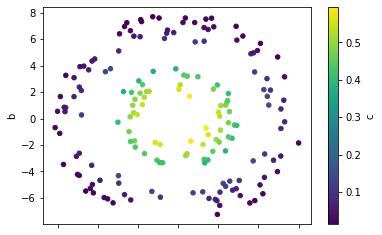

In [55]:
arry= np.stack((np.concatenate(x_true)[:,0],np.concatenate(x_true)[:,1],np.concatenate(y_pred_bath)[:,0]),axis=1)
df1= pd.DataFrame(arry,columns=['a','b','c'])
df1.plot.scatter(x='a',y='b', c='c',colormap='viridis')

In [56]:
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
model = tf.keras.Sequential()
model.add(tf.keras.Input((2,)))
model.add(tf.keras.layers.Lambda(lambda x: x ** 2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
sgd = SGD(lr=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,metrics=['accuracy'])
history=model.fit(train_data_class, validation_data=val_data_class ,epochs=10,verbose=1)



Epoch 1/10
28/28 [==============================] - 1s 6ms/step - loss: 4.3965 - accuracy: 0.6545 - val_loss: 0.6903 - val_accuracy: 0.6374
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.7843 - val_loss: 0.2437 - val_accuracy: 0.8713
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.8907 - val_loss: 0.2163 - val_accuracy: 0.9181
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9359 - val_loss: 0.2087 - val_accuracy: 0.9942
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1768 - accuracy: 0.9759 - val_loss: 0.1572 - val_accuracy: 0.9357
Epoch 6/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.9803 - val_loss: 0.1398 - val_accuracy: 0.9942
Epoch 7/10
28/28 [==============================] - 0s 3ms/step - loss: 0.1415 - accuracy: 0.9949 - val_loss: 0.1257 - val_accuracy: 0.9942
Epoch 8/10
28/28 [==

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


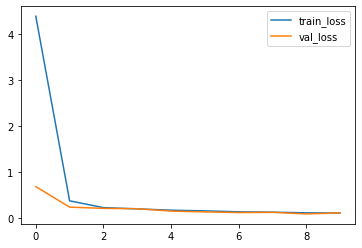

In [58]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

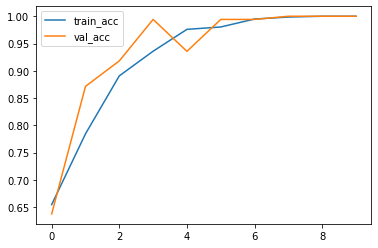

In [59]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()

In [60]:


from tensorflow.keras.layers import Dense
layer1 = Dense(2, activation="relu", name="layer1")
layer2 = Dense(3, activation="sigmoid", name="layer2")
layer3 = Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))
y



<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.53348094, -0.21963805, -0.20215204, -0.13706052],
       [-0.53348094, -0.21963805, -0.20215204, -0.13706052],
       [-0.53348094, -0.21963805, -0.20215204, -0.13706052]],
      dtype=float32)>

In [62]:
# DEFINICION
# tf.keras.layers.Dense(
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None,
#     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,name='')
# 
model = tf.keras.Sequential(
    [
        Dense(2, activation="relu", name="layer1"),
        Dense(3, activation="sigmoid", name="layer2"),
        Dense(4, name="layer3"),
    ],name='my_first_model'
)

x = tf.ones((3, 3))
y = model(x)
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.1055387 , -0.55060476, -1.0417159 , -0.74490523],
       [ 0.1055387 , -0.55060476, -1.0417159 , -0.74490523],
       [ 0.1055387 , -0.55060476, -1.0417159 , -0.74490523]],
      dtype=float32)>

In [63]:
model.layers

In [64]:
model.layers[2].weights

[<tf.Variable 'layer3/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[ 0.8373529 ,  0.14970315, -0.18642664,  0.05997199],
        [ 0.01561421, -0.82862574, -0.83007973, -0.4654443 ],
        [-0.18508196, -0.20695788, -0.9151071 , -0.86109066]],
       dtype=float32)>,
 <tf.Variable 'layer3/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [65]:
model.summary()

Model: "my_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
 layer2 (Dense)              (3, 3)                    9         
                                                                 
 layer3 (Dense)              (3, 4)                    16        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [70]:


## Input layer
initial_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(3, 3)), ##1
        #tf.keras.layers.InputLayer(input_shape=(3,3)), ##2
        #Dense(2, activation="relu", input_shape=(3,3), name="layer1"), ##3
        Dense(2, activation="relu", name="layer1"),
        Dense(3, activation="sigmoid", name="layer2"),
        Dense(4, name="layer3")
    ]
)
initial_model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3, 2)              8         
                                                                 
 layer2 (Dense)              (None, 3, 3)              9         
                                                                 
 layer3 (Dense)              (None, 3, 4)              16        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [71]:
initial_model.input

<KerasTensor: shape=(None, 3, 3) dtype=float32 (created by layer 'input_7')>

In [72]:
initial_model.output

<KerasTensor: shape=(None, 3, 4) dtype=float32 (created by layer 'layer3')>

In [73]:


model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(3,3)))
model.add(Dense(2, activation="relu"))
model.add(Dense(3, activation="sigmoid"))
model.add(Dense(4, activation="relu"))

model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3, 2)              8         
                                                                 
 dense_5 (Dense)             (None, 3, 3)              9         
                                                                 
 dense_6 (Dense)             (None, 3, 4)              16        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.trainable_variables

[<tf.Variable 'dense_4/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 0.7729634 , -0.6590555 ],
        [ 0.6526226 , -0.93919855],
        [ 0.7725189 , -0.08339953]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 0.9428077 ,  1.0730534 , -0.37515104],
        [-0.4245848 , -1.0423993 , -0.7955495 ]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[ 0.46032238,  0.5995326 ,  0.01809812, -0.35900146],
        [-0.5051241 ,  0.16999912, -0.35820657,  0.31403136],
        [ 0.3149618 , -0.75086826,  0.00570595,  0.39803624]],
       dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [75]:
for layer in model.layers:
  print(layer.trainable)

True
True
True


In [76]:
model.trainable = False
model.trainable_variables

[]

In [77]:
for layer in model.layers:
  print(layer.trainable)

False
False
False


In [79]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(3,3)))
model.add(Dense(2, activation="relu", name="layer1"))
model.add(Dense(3, activation="sigmoid", name="layer2"))
model.add(Dense(4, activation="relu", name="layer3"))
model.add(Dense(5, activation="relu", name="layer4"))
model.add(Dense(6, activation="sigmoid", name="layer5"))
model.add(Dense(7, activation="relu", name="layer6"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3, 2)              8         
                                                                 
 layer2 (Dense)              (None, 3, 3)              9         
                                                                 
 layer3 (Dense)              (None, 3, 4)              16        
                                                                 
 layer4 (Dense)              (None, 3, 5)              25        
                                                                 
 layer5 (Dense)              (None, 3, 6)              36        
                                                                 
 layer6 (Dense)              (None, 3, 7)              49        
                                                                 
Total params: 143
Trainable params: 143
Non-trainable 

In [80]:
#"Functional API"
feature_extractor = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="layer4").output,name='model_intermediate'
)
feature_extractor

In [81]:
feature_extractor.summary()

Model: "model_intermediate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3, 3)]            0         
                                                                 
 layer1 (Dense)              (None, 3, 2)              8         
                                                                 
 layer2 (Dense)              (None, 3, 3)              9         
                                                                 
 layer3 (Dense)              (None, 3, 4)              16        
                                                                 
 layer4 (Dense)              (None, 3, 5)              25        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


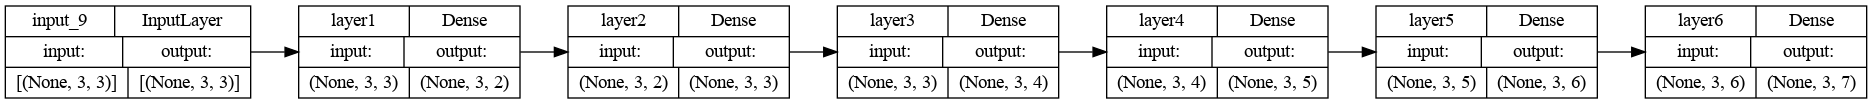

In [82]:
tf.keras.utils.plot_model(
    model,
    rankdir= 'LR',#"TB",
    to_file="model.png",
    show_shapes=True,
    show_layer_activations=False)

In [84]:
#"Functional API"
inputs = tf.keras.Input(shape=(784,), name='datos')
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='model')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 datos (InputLayer)          [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [87]:
from tensorflow.keras import layers
inputs = tf.keras.Input(shape=(32, 32, 3), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
block_1_output = layers.Dense(64, activation='relu')(x)

x = layers.Dense(32, activation='relu')(block_1_output)
x =  layers.Dense(64, activation='relu')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Dense(32, activation='relu')(block_2_output)
x = layers.Dense(64, activation='relu')(x)
block_3_output = layers.add([x, block_2_output])

x =  layers.Dense(16, activation='relu')(block_3_output)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='very_densee')
model.summary()

Model: "very_densee"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 32, 32, 64)   256         ['img[0][0]']                    
                                                                                                  
 dense_11 (Dense)               (None, 32, 32, 64)   4160        ['dense_10[0][0]']               
                                                                                                  
 dense_12 (Dense)               (None, 32, 32, 64)   4160        ['dense_11[0][0]']               
                                                                                        

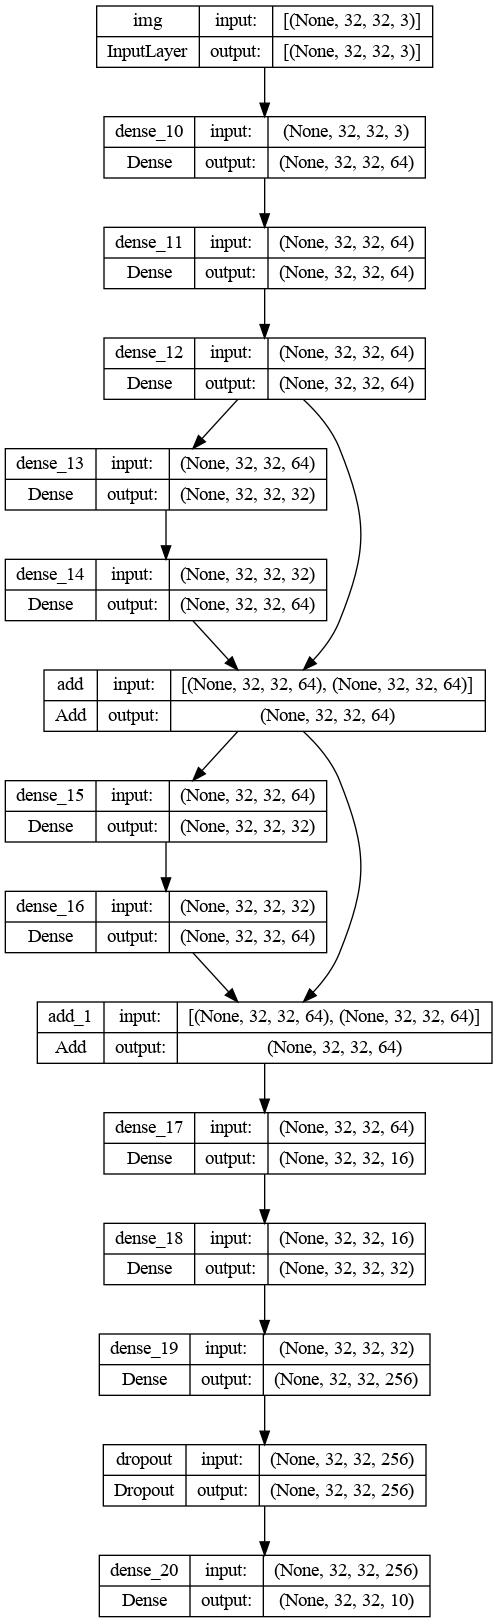

In [88]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [90]:


###Clase MODEL
class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.dense1 = layers.Dense(2, 'relu')
    self.dense2 = layers.Dense(4, 'relu')
    self.dense3 = layers.Dense(8, 'elu')

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    if not training:
      self.dense3.trainable = False 
    return x

model = MyModel()

y = model(tf.ones((1, 2))*2,training=False)
print('resultado:',y)
model.summary()



resultado: tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 8), dtype=float32)
Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            multiple                  6         
                                                                 
 dense_25 (Dense)            multiple                  12        
                                                                 
 dense_26 (Dense)            multiple                  40        
                                                                 
Total params: 58
Trainable params: 18
Non-trainable params: 40
_________________________________________________________________
